In [1]:
# notes_risk_neutral_probs.ipynb

# Pricing kernel and risk-neutral probs with power utility
# Take arbitrary distribution over a state space and compute
# pricing kernel and risk neutral probabilities for power utility.

# NYU course ECON-UB 233, Macro foundations for asset pricing.

# Written by: Mike Saint-Antoine for Dave Backus

In [26]:
# Basic Inputs

import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

alpha = 10
beta = 0.99
lambda_ = 1
# can't use lambda for a variable in python so i made it lambda_

# arbitrary state grid
zmax = 4
dz = 0.1

print("Basic Inputs")
print()
print("alpha: " + str(alpha))
print("beta: " + str(beta))
print("lambda_: " + str(lambda_))
print()
print("zmax: " + str(zmax))
print("dz: " + str(dz))

Basic Inputs

alpha: 10
beta: 0.99
lambda_: 1

zmax: 4
dz: 0.1


In [27]:

# generating z array
z = []
# had to multiply everything by 10 and then divide by 10 when appending to get rid of the .1 + .2 = .30000004 problem that computers have
i = -40
while i <=40:
    z.append(i/10)
    i = i + dz * 10

print("z:")
print(z)

z:
[-4.0, -3.9, -3.8, -3.7, -3.6, -3.5, -3.4, -3.3, -3.2, -3.1, -3.0, -2.9, -2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1, -2.0, -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0]


In [28]:
# nz = length(z);
# skewness and (excess) kurtosis
gamma1 = -0.5
gamma2 = 0.0

# Gram-Charlier distribution (normal if gamma1 = gamma2 = 0)

#p = exp(-z.^2/2).*(1 + gamma1*(z.^3-3*z)/6 + gamma2*(z.^4-6*z.^2+3)/24);

# generating p array from z array
p = []
for item in range(len(z)):
    p.append(math.exp(-z[item]**2/2)*(1 + gamma1*(z[item]**3-3*z[item])/6 + gamma2*(z[item]**4-6*z[item]**2+3)/24))


checkprobssum2one = sum(p)*dz/math.sqrt(2*math.pi)


# changing p array
probSum = sum(p)
for x in range(len(p)):
    p[x] = p[x]/probSum
    
    
print("gamma1: " + str(gamma1))
print("gamma2: " + str(gamma2))
print()
print("checkprobssum2one: " + str(checkprobssum2one))
print()
print("p:")
print(p)

gamma1: -0.5
gamma2: 0.0

checkprobssum2one: 0.9999491502665815

p:
[7.137975004920036e-05, 9.87020235462995e-05, 0.00013496419512254207, 0.00018249842406040356, 0.00024403889904233239, 0.0003227271988641592, 0.00042209760272486694, 0.0005460390553969437, 0.0006987323125944558, 0.0008845634627745371, 0.001108018445427075, 0.001373567096947159, 0.0016855492001300253, 0.0020480783586429574, 0.002464981493924664, 0.0029397915495588257, 0.0034758078456619845, 0.004076231947676456, 0.004744376800264881, 0.00548393368542575, 0.006299266409222916, 0.00719568678725464, 0.00817965233311323, 0.009258818733907437, 0.010441878871249742, 0.01173812898795131, 0.013156722329683911, 0.014705601045195176, 0.016390136474653604, 0.01821155261770837, 0.02016525244097289, 0.02223920561796555, 0.02441258288603276, 0.0266548307200009, 0.028925366378177577, 0.0311740359986758, 0.03334241882190283, 0.03536598353941217, 0.037177015881946905, 0.03870814961599339, 0.039896256754163625, 0.04068639707094289, 0.0410

In [29]:
# Bernoulli (an alternative, comment out if not needed)
# have to change variable names since p is already used
# z1 = [-1, 1]
# p1 = [0.5, 0.5]

In [30]:
# logg is a linear function of z
mug = 0.02
sigmag = 0.035

#logg = mug + sigmag*z;
# generating logg array
logg = []
for x in range(len(z)):
    logg.append(mug + sigmag * z[x])


# generating g array
g = []
for x in range(len(logg)):
    g.append(math.exp(logg[x]))
    
print("mug: " + str(mug))
print("sigmag: " + str(sigmag))
print()
print("logg:")
print(logg)
print()
print("g:")
print(g)

mug: 0.02
sigmag: 0.035

logg:
[-0.12000000000000001, -0.1165, -0.113, -0.10950000000000003, -0.10600000000000002, -0.10250000000000001, -0.099, -0.0955, -0.09200000000000001, -0.08850000000000001, -0.085, -0.0815, -0.078, -0.07450000000000001, -0.07100000000000001, -0.0675, -0.064, -0.0605, -0.05700000000000001, -0.053500000000000006, -0.05, -0.0465, -0.04300000000000001, -0.03950000000000001, -0.036000000000000004, -0.0325, -0.029, -0.025500000000000005, -0.022000000000000002, -0.018500000000000006, -0.015000000000000003, -0.011500000000000007, -0.008000000000000004, -0.0045000000000000005, -0.0010000000000000009, 0.0024999999999999988, 0.005999999999999998, 0.0095, 0.013, 0.0165, 0.02, 0.0235, 0.027000000000000003, 0.0305, 0.034, 0.037500000000000006, 0.041, 0.0445, 0.048, 0.051500000000000004, 0.05500000000000001, 0.05850000000000001, 0.062, 0.0655, 0.069, 0.07250000000000001, 0.07600000000000001, 0.0795, 0.08300000000000002, 0.08650000000000001, 0.09000000000000001, 0.093500000000

In [31]:
print('Properties of log g (check to see if we replicate inputs)')
print()
print('mean, std, gamma1, gamma2')
print()

# generating kappa1 array
kappa1 = []
for x in range(len(p)):
    kappa1.append(p[x]*logg[x])

kappa1 = sum(kappa1)


# generating dev array
dev = []
for x in range(len(logg)):
    dev.append(logg[x]-kappa1)

# generating kappa2 array
kappa2 = []
for x in range(len(p)):
    kappa2.append(p[x]*dev[x]**2)

kappa2 = sum(kappa2)

# generating kappa3 array
kappa3 = []
for x in range(len(p)):
    kappa3.append(p[x]*dev[x]**3)
kappa3 = sum(kappa3)


# generating kappa4 array
kappa4 = []
for x in range(len(p)):
    kappa4.append(p[x]*dev[x]**4)
kappa4 = sum(kappa4)







print([kappa1, math.sqrt(kappa2), kappa3/kappa2**1.5, kappa4/kappa2**2-3])

Properties of log g (check to see if we replicate inputs)

mean, std, gamma1, gamma2

[0.020042236463732245, 0.034984544443157704, -0.481580723649369, -0.00953414001356645]


In [32]:
# pricing kernel
# generating m array
m = []
for x in range(len(g)):
    m.append(beta*g[x]**(-alpha))

print("m:")
print(m)

m:
[3.2869157535091835, 3.173863654370785, 3.064699935123464, 2.9592908565594302, 2.8575072793752794, 2.759224505960191, 2.6643221276257694, 2.5726838770903258, 2.484197486036936, 2.3987545475706953, 2.3162503834067305, 2.2365839156262046, 2.159657542843219, 2.085377020630919, 2.013651346060283, 1.9443926462101497, 1.877516070511902, 1.812939686796915, 1.7505843809193977, 1.6903737598316702, 1.6322340579931267, 1.5760940469982307, 1.5218849483127992, 1.4695403490117047, 1.418996120414736, 1.370190339520944, 1.3230632131452178, 1.277557004664161, 1.233615963281507, 1.1911862557264188, 1.1502159003010004, 1.1106547031962188, 1.0724541969982087, 1.03556758130963, 0.9999496654133261, 0.9655568129080484, 0.9323468882484057, 0.9002792051235491, 0.8693144766113554, 0.8394147670470359, 0.8105434455472024, 0.7826651411324483, 0.7557456993934847, 0.7297521406477109, 0.7046526195349835, 0.6804163860030623, 0.6570137476349567, 0.6344160332719952, 0.6125955578880787, 0.5915255886720545, 0.571180312

In [33]:
# entropy


# generating logm array
logm = []
for x in range(len(m)):
    logm.append(math.log(m[x]))
    
print("logm:")
print(logm)

logm:
[1.189949664146499, 1.154949664146498, 1.1199496641464985, 1.0849496641464986, 1.0499496641464987, 1.0149496641464981, 0.9799496641464984, 0.9449496641464983, 0.9099496641464991, 0.8749496641464989, 0.8399496641464983, 0.8049496641464986, 0.7699496641464985, 0.7349496641464982, 0.6999496641464985, 0.664949664146499, 0.6299496641464987, 0.5949496641464983, 0.5599496641464985, 0.524949664146499, 0.4899496641464985, 0.4549496641464989, 0.419949664146499, 0.3849496641464984, 0.34994966414649803, 0.31494966414649866, 0.27994966414649886, 0.24494966414649844, 0.2099496641464985, 0.17494966414649887, 0.13994966414649865, 0.10494966414649844, 0.06994966414649827, 0.03494966414649867, -5.0335853501735045e-05, -0.035050335853502416, -0.07005033585350197, -0.10505033585350146, -0.1400503358535018, -0.17505033585350238, -0.21005033585350102, -0.24505033585350125, -0.2800503358535014, -0.31505033585350223, -0.35005033585350165, -0.3850503358535017, -0.42005033585350066, -0.45505033585350196, 

In [34]:
# for the next part a lot of the variables were already being used, so i had to change the names a little

kappa1_ = []
for x in range(len(p)):
    kappa1_.append(p[x]*logm[x])
kappa1_ = sum(kappa1_)


dev_ = []
for x in range(len(logm)):
    dev_.append(logm[x]-kappa1_)

kappa2_ = []
for x in range(len(p)):
    kappa2_.append(p[x]*dev[x]**2)
kappa2_ = sum(kappa2_)


kappa3_ = []
for x in range(len(p)):
    kappa3_.append(p[x]*dev[x]**3)
kappa3_ = sum(kappa3_)


kappa4_ = []
for x in range(len(p)):
    kappa4_.append(p[x]*dev[x]**4)
kappa4_ = sum(kappa4_)


print('Moments of log m (mean, std, gamma1, gamma2)')
print()
print([kappa1_, math.sqrt(kappa2_), kappa3_/kappa2_**1.5, kappa4_/kappa2_**2-3])
print()

Moments of log m (mean, std, gamma1, gamma2)

[-0.21047270049082412, 0.034984544443157704, -0.481580723649369, -0.00953414001356645]



In [35]:
Elogm = kappa1_

pm = []
for x in range(len(p)):
    pm.append(p[x]*m[x])

logEm = math.log(sum(pm))

Lm = logEm - Elogm

Lm_lognormal = kappa2_/2

print("Elogm: " + str(Elogm))
print("logEm: " + str(logEm))
print("Lm: " + str(Lm))
print("Lm_lognormal: " + str(Lm_lognormal))



Elogm: -0.21047270049082412
logEm: -0.14586196169272514
Lm: 0.06461073879809898
Lm_lognormal: 0.0006119591749476383


In [36]:
# p*

q1 = []
for x in range(len(p)):
    q1.append(p[x]*m[x])

q1 = sum(q1)

pstar = []
for x in range(len(p)):
    pstar.append(p[x]*m[x]/q1)

checkonepstar = sum(pstar)
# equity

qe = []
for x in range(len(p)):
    qe.append(p[x]*m[x]*g[x])

qe = sum(qe)


print("q1: " + str(q1))
print()
print("pstar: ")
print(pstar)
print()
print("checkonepstar: " + str(checkonepstar))
print("qe: " + str(qe))




q1: 0.8642769982846663

pstar: 
[0.00027146299783971367, 0.00036246106950455826, 0.00047857892881213756, 0.0006248759584373164, 0.0008068511968364456, 0.0010303141210667513, 0.0013012078132238387, 0.001625388477154236, 0.0020083712256660172, 0.002455058543911902, 0.002969474085433062, 0.0035545294878408197, 0.0042118545918946124, 0.0049417207145882784, 0.005743081573507554, 0.006613746613293775, 0.007550686991778881, 0.00855045626020248, 0.0096096875657039, 0.010725609522061412, 0.011896506784181683, 0.013122042044349835, 0.01440335655455746, 0.015742878429793612, 0.01714379260069551, 0.01860916231169239, 0.020140736539927727, 0.021737525886229545, 0.02339427525622475, 0.025099998283776574, 0.02683675955419915, 0.02857889121654695, 0.030292807777662425, 0.03193753696293259, 0.033466018983753974, 0.03482714789830385, 0.035968445876697015, 0.036839184211156846, 0.03739370383283299, 0.03759465131805923, 0.0374158394567208, 0.036844466263594784, 0.03588248062606034, 0.03454696057412054, 0.

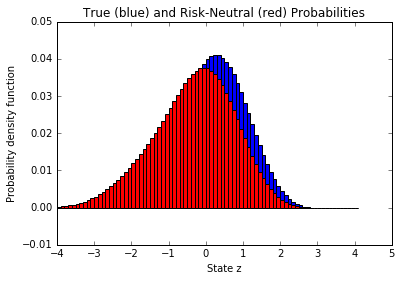

In [39]:
# Figures

# plotting true and risk-neutral probabilities
# x axis: state z
# y axis: probabilities 

plt.title("True (blue) and Risk-Neutral (red) Probabilities")
plt.xlabel("State z")
plt.ylabel("Probability density function")
plt.bar(z,p,0.1,)
plt.bar(z,pstar,0.1,color='r')
plt.show()

